In [2]:
# Install required packages
!pip install rasterio
!pip install geopandas

     |████████████████████████████████| 19.3 MB 1.4 MB/s 
     |████████████████████████████████| 994 kB 4.9 MB/s 
     |████████████████████████████████| 6.6 MB 18.7 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 


In [3]:
# Import required packages
# --------------------
import rasterio
from rasterio import mask

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import geopandas as gpd
import pandas as pd

import folium

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Using WorldPop data

In [ ]:
# Download raster/tif file (download gridded population data from WorldPop)
# Data from: https://data.humdata.org/dataset/worldpop-population-counts-for-france
# --------------------

# 2020 data
#!wget -O "/content/gdrive/MyDrive/Omdena/Official Folder/Data/Population/fra_ppp_2020.tif" "https://data.worldpop.org/GIS/Population/Global_2000_2020/2020/FRA/fra_ppp_2020.tif"

# 2019 data
#!wget -O "/content/gdrive/MyDrive/Omdena/Official Folder/Data/Population/fra_ppp_2019.tif" "https://data.worldpop.org/GIS/Population/Global_2000_2020/2019/FRA/fra_ppp_2019.tif"

--2021-08-09 01:49:13--  https://data.worldpop.org/GIS/Population/Global_2000_2020/2020/FRA/fra_ppp_2020.tif
Resolving data.worldpop.org (data.worldpop.org)... 152.78.118.157, ::ffff:152.78.118.157
Connecting to data.worldpop.org (data.worldpop.org)|152.78.118.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444906193 (424M) [image/tiff]
Saving to: ‘/content/gdrive/MyDrive/Omdena/Official Folder/Data/Population/fra_ppp_2020.tif’

/content/gdrive/MyD 100%[===================>] 424.29M  1.40MB/s    in 5m 10s  

2021-08-09 01:54:23 (1.37 MB/s) - ‘/content/gdrive/MyDrive/Omdena/Official Folder/Data/Population/fra_ppp_2020.tif’ saved [444906193/444906193]

--2021-08-09 01:54:23--  https://data.worldpop.org/GIS/Population/Global_2000_2020/2019/FRA/fra_ppp_2019.tif
Resolving data.worldpop.org (data.worldpop.org)... ::ffff:152.78.118.157, 152.78.118.157
Connecting to data.worldpop.org (data.worldpop.org)|::ffff:152.78.118.157|:443... connected.
HTTP request sent, a

In [ ]:
# Read raster/tif file
# --------------------
fra_tif = '/content/gdrive/MyDrive/Omdena/local_data/fra_ppp_2020.tif'
raster_fra = rasterio.open(fra_tif)
pop_fra_data = raster_fra.read(1)

# A crude way to count the population size represented in the image
pop_fra_count = pop_fra_data[pop_fra_data > 0].sum()

print(pop_fra_count)

68014970.0


In [ ]:
## Plot raster/tif image
# --------------------
def plot_raster(rast_data, title='', figsize=(10,10)):
  """
  Plots population count in log scale(+1)
  """
  plt.figure(figsize = figsize)
  im1 = plt.imshow(np.log1p(rast_data),) # vmin=0, vmax=2.1)

  plt.title("{}".format(title), fontdict = {'fontsize': 50})  
  plt.axis('off')
  plt.colorbar(im1, fraction=0.03)


  
title = 'Population Distribution (2020) in France (Log Scaled) n Est count: {}'.format(pop_fra_count)
plot_raster(pop_fra_data, title, (50,50))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# The shape files for France were downloaded here:
# https://gadm.org/

# Unzip content

#!unzip "/content/gdrive/MyDrive/Omdena/Official Folder/Data/gadm36_FRA_shp.zip" -d "/content/gdrive/MyDrive/Omdena/Official Folder/Data/Population/Shape/"

Archive:  /content/gdrive/MyDrive/Omdena/Official Folder/Data/gadm36_FRA_shp.zip
replace /content/gdrive/MyDrive/Omdena/Official Folder/Data/Population/Shape/gadm36_FRA_0.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Text(0.5, 1.0, 'France: level 3 regions')

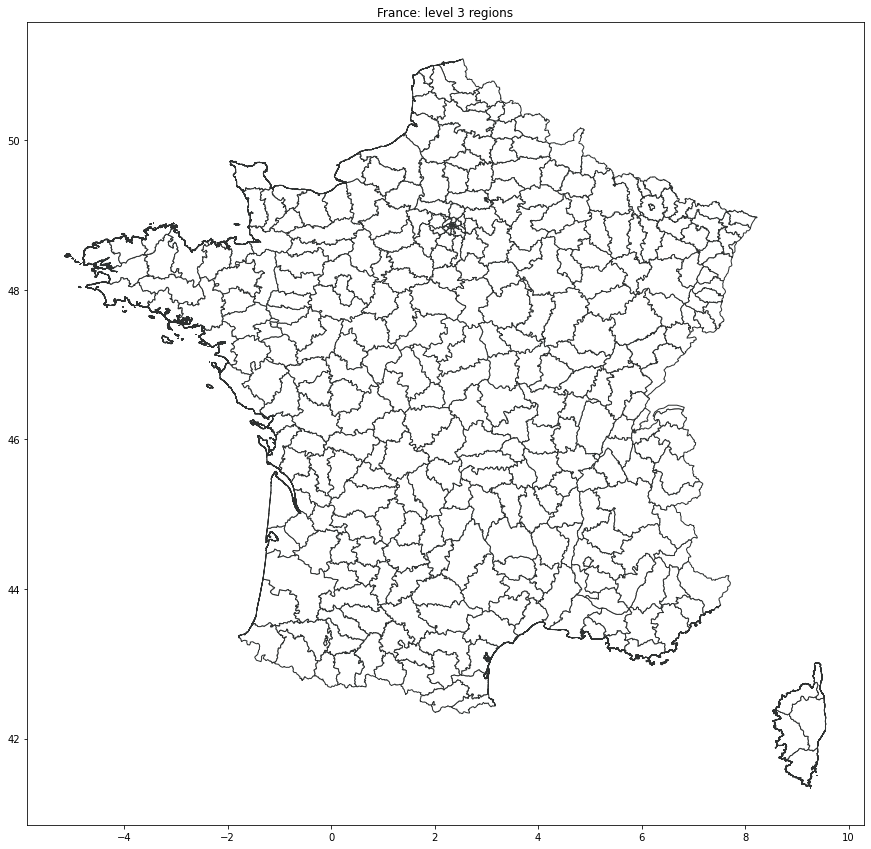

In [88]:
# Loading level 3 shape (City level)
fra_gdf = gpd.GeoDataFrame.from_file("/content/gdrive/MyDrive/Omdena/Official Folder/Data/Population/Shape/gadm36_FRA_3.shp")

# plot the shapefile
plt.rcParams['figure.figsize'] = 15,15
fra_gdf.plot(color="white", edgecolor="#2e3131")
plt.title('France: level 3 regions')

In [ ]:
fra_gdf.head(5) #check the first few rows of the shapefile dataframe

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,None,FRA.1.1_1,Ain,None,FRA.1.1.1_1,Belley,None,None,Arrondissement,Districts,None,None,"POLYGON ((5.25563 45.78431, 5.24020 45.77737, ..."
1,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,None,FRA.1.1_1,Ain,None,FRA.1.1.2_1,Bourg-en-Bresse,None,None,Arrondissement,Districts,None,None,"POLYGON ((4.79174 46.16360, 4.78232 46.17163, ..."
2,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,None,FRA.1.1_1,Ain,None,FRA.1.1.3_1,Gex,None,None,Arrondissement,Districts,None,None,"POLYGON ((5.89303 46.11892, 5.88623 46.10962, ..."
3,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,None,FRA.1.1_1,Ain,None,FRA.1.1.4_1,Nantua,None,None,Arrondissement,Districts,None,None,"POLYGON ((5.40437 46.00782, 5.35556 46.02372, ..."
4,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,None,FRA.1.2_1,Allier,None,FRA.1.2.1_1,Montluçon,None,None,Arrondissement,Districts,None,None,"POLYGON ((2.38608 46.33197, 2.37061 46.31272, ..."


In [ ]:
fra_gdf.crs   #to see the CRS format of the file

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Take a look in the City names

fra_gdf['NAME_3'].unique()

array(['Belley', 'Bourg-en-Bresse', 'Gex', 'Nantua', 'Montluçon',
       'Moulins', 'Vichy', 'Largentière', 'Privas', 'Tournon-sur-Rhône',
       'Aurillac', 'Mauriac', 'Saint-Flour', 'Die', 'Nyons', 'Valence',
       'Brioude', 'Le Puy-en-Velay', 'Yssingeaux', 'Annecy', 'Bonneville',
       'Lac Léman', 'Saint-Julien-en-Genevois', 'Thonon-les-Bains',
       'Grenoble', 'La Tour-du-Pin', 'Vienne', 'Montbrison', 'Roanne',
       'Saint-Étienne', 'Ambert', 'Clermont-Ferrand', 'Issoire', 'Riom',
       'Thiers', 'Lyon', 'Villefranche-sur-Saône', 'Albertville',
       'Chambéry', 'Saint-Jean-de-Maurienne', 'Beaune', 'Dijon',
       'Montbard', 'Besançon', 'Montbéliard', 'Pontarlier', 'Lure',
       'Vesoul', 'Dole', 'Lons-le-Saunier', 'Saint-Claude',
       'Château-Chinon (Ville)', 'Clamecy', 'Cosne-Cours-sur-Loire',
       'Nevers', 'Autun', 'Chalon-sur-Saône', 'Charolles', 'Louhans',
       'Mâcon', 'Belfort', 'Auxerre', 'Avallon', 'Sens', 'Dinan',
       'Guingamp', 'Lannion', 'Saint-B

In [ ]:
# using mask.mask function from Rasterio to define the region of interest
gtraster, bound = mask.mask(raster_fra, fra_gdf[fra_gdf['NAME_3'] == "Bordeaux"].geometry, crop=True)

gtraster[0][gtraster[0]>0].sum()

949023.7

In [ ]:
# Putting everything together to produce the local-scale population estimates of all the districts defined in the shapefile, for 2019 and 2020

# Reload level 3 shape (City level)
fra_gdf = gpd.GeoDataFrame.from_file("/content/gdrive/MyDrive/Omdena/Official Folder/Data/Population/Shape/gadm36_FRA_3.shp")

# Estimate the population size per defined district for each year (from the .tif image available for each year)
# --------------------
for year in [2019, 2020]:
    # Read raster/tif file
    raster_fra = '/content/gdrive/MyDrive/Omdena/Official Folder/Data/Population/fra_ppp_{}.tif'.format(year) 
    pop_raster_fra = rasterio.open(raster_fra)   
    pop_fra_data = pop_raster_fra.read(1)
    
    # loop through each defined district contained in the shapefile and use it as the mask to extract values
    _results = []
    for i in fra_gdf['GID_3']:
        roi = fra_gdf[fra_gdf.GID_3 == i]

        # using the mask.mask module from Rasterio to specify the ROI
        gtraster, bound = mask.mask(pop_raster_fra, roi["geometry"], crop=True)
        
        # values greater than 0 represent the estimated population count for that pixel
        _results.append(gtraster[0][gtraster[0]>0].sum())
     
    # save the estimated counts for each year in a new column
    fra_gdf[str(year)+'_population'] = _results
    
 
# also, compute the percentage change in estimated counts across years
fra_gdf['growth_rate'] = fra_gdf[['2019_population', '2020_population']].pct_change(axis=1)['2020_population']*100

In [ ]:
fra_gdf.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry,2019_population,2020_population,growth_rate
0,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,None,FRA.1.1_1,Ain,None,FRA.1.1.1_1,Belley,None,None,Arrondissement,Districts,None,None,"POLYGON ((5.25563 45.78431, 5.24020 45.77737, ...",107867.187500,109602.531250,1.608778
1,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,None,FRA.1.1_1,Ain,None,FRA.1.1.2_1,Bourg-en-Bresse,None,None,Arrondissement,Districts,None,None,"POLYGON ((4.79174 46.16360, 4.78232 46.17163, ...",386362.531250,392125.937500,1.491709
2,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,None,FRA.1.1_1,Ain,None,FRA.1.1.3_1,Gex,None,None,Arrondissement,Districts,None,None,"POLYGON ((5.89303 46.11892, 5.88623 46.10962, ...",98302.218750,100926.429688,2.669534
3,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,None,FRA.1.1_1,Ain,None,FRA.1.1.4_1,Nantua,None,None,Arrondissement,Districts,None,None,"POLYGON ((5.40437 46.00782, 5.35556 46.02372, ...",90352.859375,91014.164062,0.731913
4,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,None,FRA.1.2_1,Allier,None,FRA.1.2.1_1,Montluçon,None,None,Arrondissement,Districts,None,None,"POLYGON ((2.38608 46.33197, 2.37061 46.31272, ...",115585.765625,115549.882812,-0.031044


In [ ]:
# Export the new data to a CSV

fra_gdf.to_csv("/content/gdrive/MyDrive/Omdena/Official Folder/Data/Population/fra_gdf_2019_20.csv")

In [ ]:
# Get subset of cities of interest
french_cities = ['Tours', 'Marseille', 'Nîmes', 'Besançon', 'Nantes', 'Rennes', 'Toulouse', 'Nancy', 'Clermont-Ferrand', 'Paris', 'Lille', 'Orléans', 'Montpellier', 'Lyon', 'Amiens', 'Dijon', 'Rouen', 'Grenoble', 'Toulon', 'Limoges', 'Caen', 'Perpignan', 'Bordeaux', 'Nice', 'Saint-Étienne', 'Metz', 'Strasbourg']

fra_gdf_2 = fra_gdf[ fra_gdf["NAME_3"].isin( french_cities ) ]

# Calculate the missing cities
set(french_cities) - set(fra_gdf_2["NAME_3"])

{'Metz', 'Paris', 'Strasbourg'}

In [ ]:
# Get all Metz 'arrondissements'
metz = fra_gdf[ fra_gdf["NAME_3"].str.contains("Metz") ]

# Get all Paris 'arrondissements'
paris = fra_gdf[ fra_gdf["NAME_3"].str.contains("Paris") ]

# Get all Metz 'arrondissements'
strasbourg = fra_gdf[ fra_gdf["NAME_3"].str.contains("Strasbourg") ]

strasbourg

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry,2019_population,2020_population,growth_rate
115,FRA,France,FRA.6_1,Grand Est,None,FRA.6.3_1,Bas-Rhin,None,FRA.6.3.5_1,Strasbourg-Campagne,None,None,Arrondissement,Districts,None,None,"POLYGON ((7.76695 48.48690, 7.76712 48.47852, ...",301368.28125,303529.0625,0.716990
116,FRA,France,FRA.6_1,Grand Est,None,FRA.6.3_1,Bas-Rhin,None,FRA.6.3.6_1,Strasbourg-Ville,None,None,Arrondissement,Districts,None,None,"POLYGON ((7.83600 48.63377, 7.83578 48.63320, ...",279674.06250,280494.5000,0.293355


In [ ]:
# Merge all the cities into a single dataset
french_cities_df = pd.concat([fra_gdf_2, metz, paris, strasbourg])

french_cities_df['NAME_3']

24                      Grenoble
29                 Saint-Étienne
31              Clermont-Ferrand
35                          Lyon
41                         Dijon
43                      Besançon
74                        Rennes
92                         Tours
97                       Orléans
134                        Nancy
160                        Lille
174                       Amiens
222                         Caen
237                        Rouen
260                     Bordeaux
265                      Limoges
290                        Nîmes
296                     Toulouse
302                  Montpellier
309                    Perpignan
317                       Nantes
337                         Nice
341                    Marseille
346                       Toulon
142                Metz-Campagne
143                   Metz-Ville
183    Paris, 11e arrondissement
184    Paris, 12e arrondissement
185     Paris, 12e arronissement
186    Paris, 13e arrondissement
187    Par

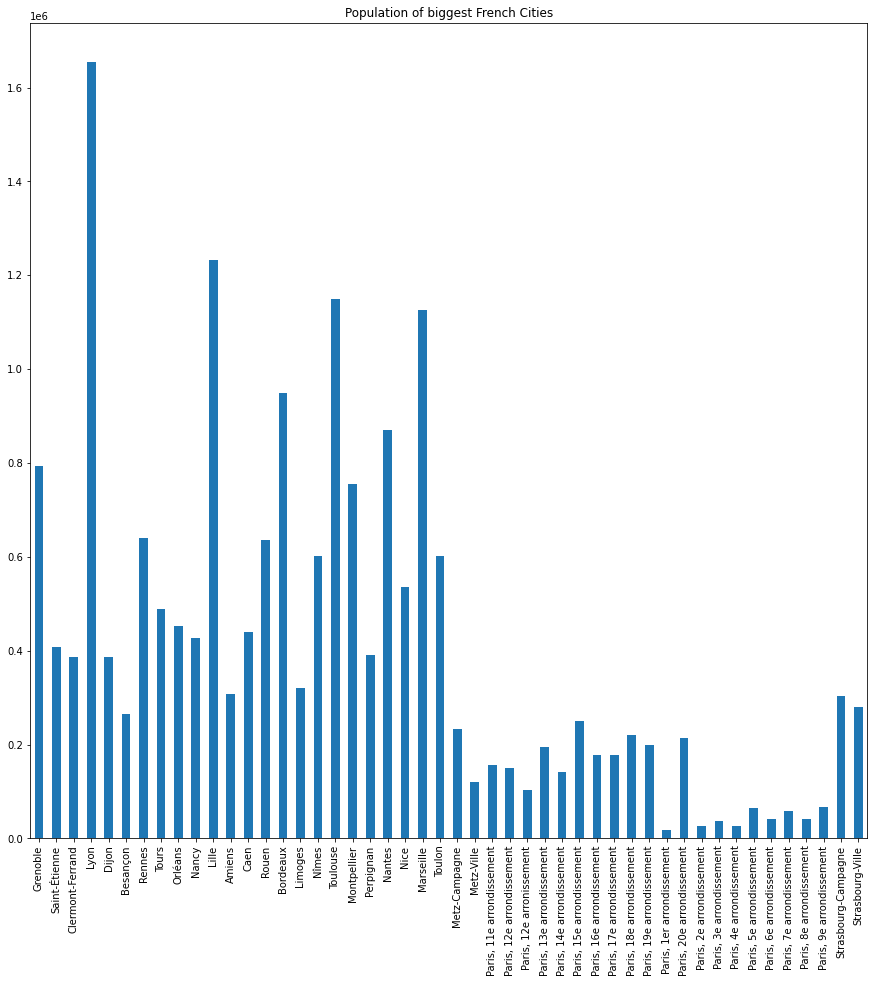

In [ ]:
ax = french_cities_df['2020_population'].plot(kind='bar', title="Population of biggest French Cities")

ax.set_xticklabels(french_cities_df["NAME_3"]);

In [ ]:
# Export the new data to a CSV

french_cities_df.to_csv("/content/gdrive/MyDrive/Omdena/Official Folder/Data/Population/population_selected_cities.csv")

## Using Insee data
Using 2018 population data from Insee (Institut national de la statistique et des études économiques).

Source: https://statistiques-locales.insee.fr/#c=indicator&i=pop_legales.popmun&s=2018&view=map1

In [206]:
pop_df = pd.read_csv('/content/gdrive/MyDrive/Omdena/Official Folder/Data/Population/insee/population-municipale-2018.csv', skiprows=2, delimiter=';')

pop_df.head()

,Code,Libellé,Population municipale 2018
0,01001,L'Abergement-Clémenciat,771.0
1,01002,L'Abergement-de-Varey,253.0
2,01004,Ambérieu-en-Bugey,14204.0
3,01005,Ambérieux-en-Dombes,1720.0
4,01006,Ambléon,112.0


In [207]:
# Number of 'communes' (administrative regions)

pop_df.shape[0]

34965

In [208]:
# Rename columns
pop_df = pop_df.rename(columns={"Libellé": "Commune", "Population municipale 2018": "Population"})

In [209]:
# Getting data about the 27 cities of interest

french_cities = ['Tours', 'Marseille', 'Nîmes', 'Besançon', 'Nantes', 'Rennes', 'Toulouse', 'Nancy', 'Clermont-Ferrand', 'Paris', 'Lille', 'Orléans', 'Montpellier', 'Lyon', 'Amiens', 'Dijon', 'Rouen', 'Grenoble', 'Toulon', 'Limoges', 'Caen', 'Perpignan', 'Bordeaux', 'Nice', 'Saint-Étienne', 'Metz', 'Strasbourg']

pop_df = pop_df[ pop_df['Commune'].isin(french_cities) ]

pop_df['Commune'].count()

27

In [211]:
pop_df.sort_values(by=['Population'], ascending=False).head(10)

,Code,Commune,Population
29269,75056,Paris,2175601.0
4347,13055,Marseille,868277.0
27105,69123,Lyon,518635.0
11810,31555,Toulouse,486828.0
1957,06088,Nice,341032.0
16311,44109,Nantes,314138.0
13016,34172,Montpellier,290053.0
26553,67482,Strasbourg,284677.0
12371,33063,Bordeaux,257068.0
22145,59350,Lille,233098.0


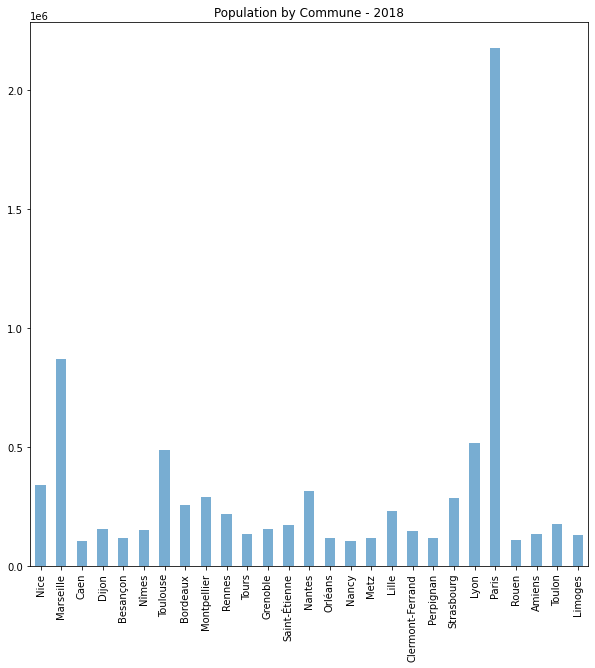

In [163]:
ax = pop_df['Population'].plot(kind='bar', title="Population by Commune - 2018", figsize=(10,10), alpha=0.6)

ax.set_xticklabels(pop_df['Commune']);

In [86]:
# Export the new data to a CSV

pop_df.to_csv("/content/gdrive/MyDrive/Omdena/Official Folder/Data/Population/insee/population_selected_cities_insee.csv", index=False)

In [164]:
# Getting geolocations
# https://medium.com/analytics-vidhya/how-to-generate-lat-and-long-coordinates-of-city-without-using-apis-25ebabcaf1d5
from  geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='my-application')
city = 'Bordeaux'
country = 'France'
loc = geolocator.geocode(city+','+ country)
print('latitude is: ' ,loc.latitude,'\nlongtitude is: ' ,loc.longitude)

latitude is:  44.841225 
longtitude is:  -0.5800364


In [212]:
Latitude = []
Longitude = []

for commune in pop_df['Commune']:
  geolocator = Nominatim(user_agent='my-application')
  city = commune
  country = 'France'
  loc = geolocator.geocode(city+','+country)

  Latitude.append(loc.latitude)
  Longitude.append(loc.longitude)

# Create new columns with the position
pop_df['Latitude'] = Latitude
pop_df['Longitude'] = Longitude

pop_df.head()

,Code,Commune,Population,Latitude,Longitude
1957,06088,Nice,341032.0,43.700936,7.268391
4347,13055,Marseille,868277.0,43.296174,5.369953
4496,14118,Caen,105512.0,49.181340,-0.363561
6805,21231,Dijon,156854.0,47.321581,5.041470
8437,25056,Besançon,116775.0,47.238022,6.024362


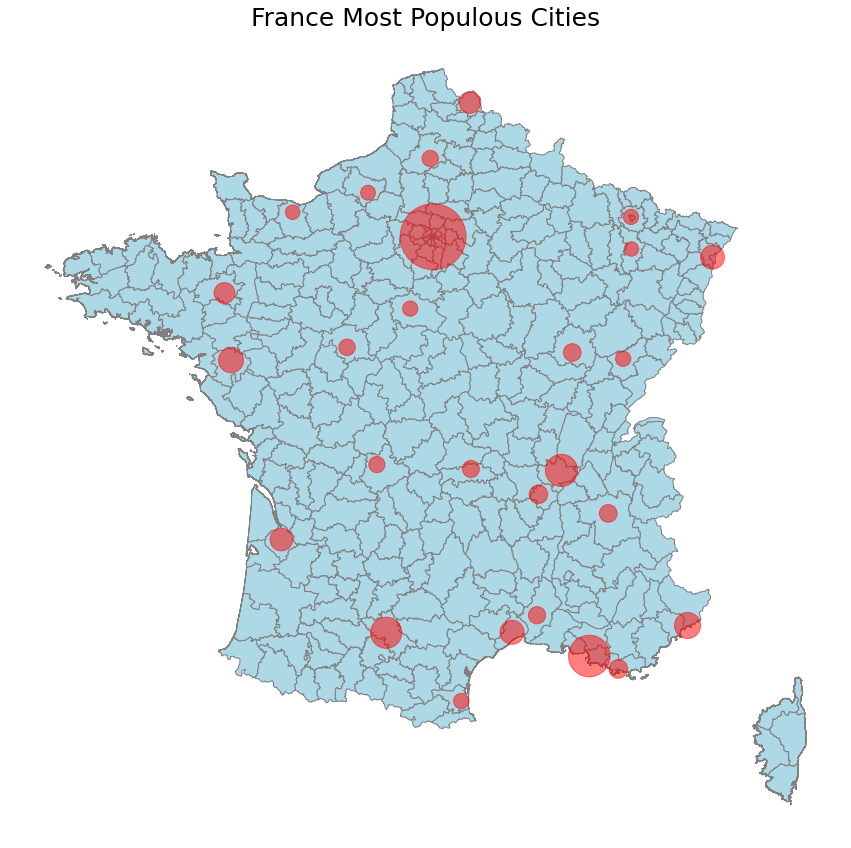

In [215]:
# Create the GeoPandas dataframe
pop_gdf = gpd.GeoDataFrame(pop_df, geometry=gpd.points_from_xy(pop_df.Longitude, pop_df.Latitude))
pop_gdf = pop_gdf.set_crs("EPSG:4326")

# Plot the Shapefile with populations
plt.rcParams['figure.figsize'] = 15,15
ax = fra_gdf.plot(color="lightblue", edgecolor="gray")
plt.axis('off')
plt.title('France Most Populous Cities', size=25)

pop_gdf.plot(ax=ax, color='red', markersize=pop_df['Population']/500, alpha=0.5)


plt.show()

In [104]:
pop_gdf.head()

,Code,Commune,Population,Latitude,Longitude,geometry
1957,06088,Nice,341032.0,43.700936,7.268391,POINT (7.26839 43.70094)
4347,13055,Marseille,868277.0,43.296174,5.369953,POINT (5.36995 43.29617)
4496,14118,Caen,105512.0,49.181340,-0.363561,POINT (-0.36356 49.18134)
6805,21231,Dijon,156854.0,47.321581,5.041470,POINT (5.04147 47.32158)
8437,25056,Besançon,116775.0,47.238022,6.024362,POINT (6.02436 47.23802)
